In [11]:
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as mt
from sklearn.metrics import accuracy_score

# 1. 데이터 전처리

In [12]:
data = pd.read_csv("departure_data.csv", encoding='euc-kr')
df = pd.DataFrame(data)
df['최저운고'].fillna(0, inplace=True)
df['강수량(mm)'].fillna(0, inplace=True)
df['현황'].fillna('출발', inplace=True)

In [13]:
# 취소 데이터 확인하기
df.loc[(df['현황'] == '취소') & (df['사유'] == '태풍'), '현황'] = '기상 취소'
cancel_rows = df[df['현황'] == '취소']
reason_counts = cancel_rows['사유'].value_counts()
print(reason_counts)

Series([], Name: 사유, dtype: int64)


In [14]:
# 지연 데이터 확인하기
delay_rows = df[df['현황'] == '지연']
reason_counts = cancel_rows['사유'].value_counts()
print(reason_counts)

Series([], Name: 사유, dtype: int64)


In [15]:
# 기상 취소, 기상 지연의 이유가 아닌 행들을 삭제하는 코드
# 취소에 사유가 없는 열 삭제
df = df[(df['현황'] != '취소')]
# 지연에 사유가 없는 열 삭제
df = df[(df['현황'] != '지연') | (df['사유'].notna())]
# 회항, 기상회항 삭제
df = df[(df['현황'] != '회항')]
df = df[(df['현황'] != '기상 회항')]

In [16]:
df

,날짜,항공사,편명,출발공항코드,출발공항명,도착공항코드,도착공항명,계획시간,예상시간,출발시간,시간,온도,시정,전운량,최저운고,풍속,강수량(mm),구분,현황,사유
0,2017-01-01 00:00:00,아시아나항공,OZ286,ICN,인천,SFO,샌프란시스코,00:05,23:40,00:07,00:00,0.2,450,2,30.0,2,0.0,화물,출발,NaN
1,2017-01-01 00:00:00,에미레이트항공,EK323,ICN,인천,DXB,두바이,00:10,23:50,00:40,00:00,0.2,450,2,30.0,2,0.0,여객,출발,NaN
2,2017-01-01 00:00:00,아시아나항공,OZ2041,ICN,인천,LAX,로스앤젤레스,00:10,23:50,00:28,00:00,0.2,450,2,30.0,2,0.0,여객,출발,NaN
3,2017-01-01 00:00:00,싱가폴항공,SQ007,ICN,인천,SIN,싱가포르,00:25,00:36,00:35,00:00,0.2,450,2,30.0,2,0.0,여객,출발,NaN
4,2017-01-01 00:00:00,터키항공,TK91,ICN,인천,IST,아타튀르크,00:40,00:40,01:01,00:00,0.2,450,2,30.0,2,0.0,여객,출발,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585021,2019-12-31 00:00:00,아시아나항공,OZ286,ICN,인천,SFO,샌프란시스코,23:30,23:30,23:42,23:00,-4.1,1000,8,30.0,3,0.0,화물,출발,NaN
585022,2019-12-31 00:00:00,대한항공,KE319,ICN,인천,CAN,광저우,23:35,23:35,23:33,23:00,-4.1,1000,8,30.0,3,0.0,화물,출발,NaN
585023,2019-12-31 00:00:00,필리핀에어아시아,Z27047,ICN,인천,CEB,세부,23:50,23:50,23:54,23:00,-4.1,1000,8,30.0,3,0.0,여객,출발,NaN
585024,2019-12-31 00:00:00,산동항공,SC4722,ICN,인천,TAO,청도,23:50,23:50,23:56,23:00,-4.1,1000,8,30.0,3,0.0,여객,출발,NaN


In [17]:
# 데이터 값 확인하기
print("현황 현황\n",df['현황'].value_counts())
print()
print("사유 현황\n", df["사유"].value_counts())

현황 현황
 출발       532733
기상 지연      4918
기상 취소       473
Name: 현황, dtype: int64

사유 현황
 제방빙작업    2522
태풍        797
시정        796
강수(눈)     422
뇌전        304
바람        216
기상-항로     179
기상-기타     102
운고         33
낙뢰         14
황사          5
기상          1
Name: 사유, dtype: int64


### 증폭 전 데이터 분포 시각화 하기

C:\Users\user\AppData\Local\Temp\ipykernel_9256\663433293.py:8: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('/Users/user/Documents/DataMining/termproject.png')
C:\Users\user\AppData\Local\Temp\ipykernel_9256\663433293.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('/Users/user/Documents/DataMining/termproject.png')
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


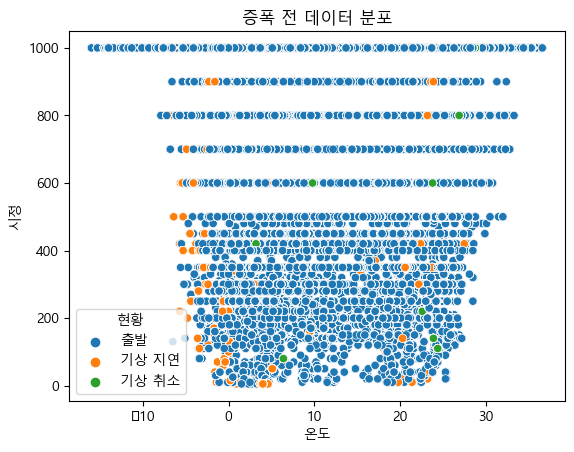

In [28]:
# 사용할 칼럼들을 추출 (기상 요건들과 운송 현황)
selected = ['온도','시정', '전운량', '최저운고','풍속', '강수량(mm)', '현황']
sdf = df[selected]

sns.scatterplot(data=sdf, x=sdf.iloc[:, 0], y=sdf.iloc[:, 1], hue='현황')
plt.title("증폭 전 데이터 분포")
plt.savefig('/Users/user/Documents/DataMining/termproject.png')

# 2. resample

In [29]:
# 각 카테고리별 데이터 개수 출력
print("원본 데이터셋의 각 카테고리별 개수:")
print(df['현황'].value_counts())

# 출발 이외의 데이터를 추출
non_departure_data = df[df['현황'] != '출발']

# 출발 데이터만 따로 추출
departure_data = df[df['현황'] == '출발']

# 각 카테고리별 데이터 개수에 맞게 샘플링
from sklearn.utils import resample
resampled_data = pd.concat([
    resample(df[df['현황'] == category], replace=True, n_samples=df['현황'].value_counts().max(), random_state=42)
    for category in df['현황'].unique()
])

# 새로운 데이터셋의 각 카테고리별 개수 출력
print("\n새로운 데이터셋의 각 카테고리별 개수:")
print(resampled_data['현황'].value_counts())

원본 데이터셋의 각 카테고리별 개수:
출발       532733
기상 지연      4918
기상 취소       473
Name: 현황, dtype: int64

새로운 데이터셋의 각 카테고리별 개수:
출발       532733
기상 지연    532733
기상 취소    532733
Name: 현황, dtype: int64


In [10]:
resampled_data

,날짜,항공사,편명,출발공항코드,출발공항명,도착공항코드,도착공항명,계획시간,예상시간,출발시간,시간,온도,시정,전운량,최저운고,풍속,강수량(mm),구분,현황,사유
135407,2017-09-23 00:00:00,진에어,LJ001,ICN,인천,BKK,수안나폼(방콕),19:55,19:55,20:33,19:00,21.0,1000,1,7.0,6,0.0,여객,출발,NaN
146105,2017-10-13 00:00:00,대한항공,KE847,ICN,인천,TNA,지난,13:10,13:10,13:35,13:00,17.0,1000,5,180.0,9,0.0,여객,출발,NaN
406101,2019-02-01 00:00:00,에어인디아,AI317,ICN,인천,BOM,뭄바이,13:50,13:50,14:14,13:00,2.2,1000,4,45.0,8,0.0,여객,출발,NaN
288823,2018-07-10 00:00:00,에어아스타나항공,KC210,ICN,인천,TSE,누르술탄 나자르바예프,12:55,12:55,13:37,12:00,26.0,1000,8,40.0,10,0.0,여객,출발,NaN
122682,2017-08-24 00:00:00,산동항공,SC4988,ICN,인천,TNA,지난,22:40,22:40,23:24,22:00,24.2,1000,1,180.0,1,0.0,여객,출발,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524907,2019-09-04 00:00:00,중국동방항공,MU218,ICN,인천,YNZ,옌청,12:15,14:15,:,12:00,21.7,1000,8,10.0,8,16.0,여객,기상 취소,뇌전
126404,2017-09-11 00:00:00,대한항공,KE035,ICN,인천,ATL,애틀랜타,09:20,09:20,:,09:00,19.8,1000,8,30.0,17,0.0,여객,기상 취소,태풍
515131,2019-08-09 00:00:00,아시아나항공,OZ367,ICN,인천,PVG,푸동,20:00,:,:,20:00,27.0,1000,1,200.0,3,0.0,여객,기상 취소,태풍
109664,2017-08-23 00:00:00,캐세이퍼시픽항공,CX415,ICN,인천,HKG,홍콩,08:40,:,:,08:00,25.9,500,8,5.0,6,0.0,여객,기상 취소,태풍


### 증폭 후 데이터 분포 시각화 하기 (resample)

C:\Users\user\AppData\Local\Temp\ipykernel_9256\2829732093.py:7: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('/Users/user/Documents/DataMining/termproject.png')
C:\Users\user\AppData\Local\Temp\ipykernel_9256\2829732093.py:7: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('/Users/user/Documents/DataMining/termproject.png')
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


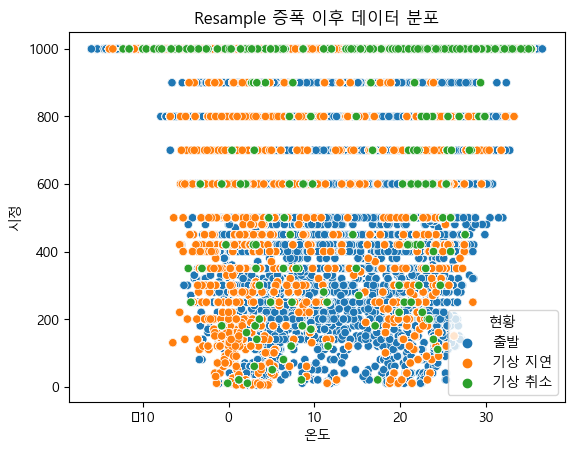

In [30]:
# 사용할 칼럼들을 추출 (기상 요건들과 운송 현황)
selected = ['온도','시정', '전운량', '최저운고','풍속', '강수량(mm)', '현황']
sdf2 = resampled_data[selected]

sns.scatterplot(data=sdf2, x=sdf2.iloc[:, 0], y=sdf2.iloc[:, 1], hue='현황')
plt.title("Resample 증폭 이후 데이터 분포")
plt.savefig('/Users/user/Documents/DataMining/termproject.png')

# 3. train-test data set 설정

In [11]:
#Dataset 설정
X = resampled_data[["온도", '시정', '전운량', '최저운고', '풍속', '강수량(mm)']]
y = resampled_data['현황']
#test, training (7:3 분할)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 100)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1118739, 6) (479460, 6) (1118739,) (479460,)


# 4. 모델링 - Decision Tree (원본 Resampled Data)

### Hyper Parameter Tuning - GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV

#테스트하고자 하는 파라미터 값들을 사전 타입으로 정의
dt = DecisionTreeClassifier(random_state = 33)
parameters = {'max_depth': [10, 15, 20, 25, 30],
              'min_samples_split': [16, 32, 64],
              'splitter': ['best', 'random']}

grid_dt = GridSearchCV(dt,
                      param_grid = parameters, cv = 5
                      )

grid_dt.fit(X_test, y_test)

result = pd.DataFrame(grid_dt.cv_results_['params'])
result['mean_test_score'] = grid_dt.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,max_depth,min_samples_split,splitter,mean_test_score
25,30,16,random,0.946392
24,30,16,best,0.946194
26,30,32,best,0.945493
27,30,32,random,0.944940
21,25,32,random,0.942823
18,25,16,best,0.942054
19,25,16,random,0.941997
20,25,32,best,0.941409
28,30,64,best,0.931948
22,25,64,best,0.928605


In [17]:
# 최적의 DT 만들기
best_params = {'max_depth' : 30, 'min_samples_split': 16, 'splitter': 'random'}

#최적 파라미터 조합으로 DecisionTreeClassifier 초기화
best_dt = DecisionTreeClassifier(**best_params)

#최적모델로 학습
best_dt.fit(X_test, y_test)

DecisionTreeClassifier(max_depth=30, min_samples_split=16, splitter='random')

### 교차검증

In [22]:
from sklearn.model_selection import cross_val_score, cross_validate

#각 폴드의 스코어
scores = cross_val_score(best_dt, X, y, cv = 5)
scores

pd.DataFrame(cross_validate(best_dt, X, y, cv = 5))
print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.9470065990092363


### 학습결과평가

In [23]:
predict_test = best_dt.predict(X_test)

# 학습결과평가
from sklearn.metrics import classification_report

print('Test Data:\n', classification_report(y_test, predict_test, zero_division=0))

Test Data:
               precision    recall  f1-score   support

       기상 지연       0.92      0.94      0.93    159849
       기상 취소       0.93      0.99      0.96    159881
          출발       1.00      0.91      0.95    159730

    accuracy                           0.95    479460
   macro avg       0.95      0.95      0.95    479460
weighted avg       0.95      0.95      0.95    479460



# 4. 모델링 - Random Forest (원본 Resampled Data)

### Hyper Parameter Tuning - GridSearchCV

In [24]:
#하이퍼 파라미터 튜닝(그리드 서치)

from sklearn.model_selection import GridSearchCV

#테스트하고자 하는 파라미터 값들을 사전 타입으로 정의
rf = RandomForestClassifier(random_state=10)

parameters = {'n_estimators': [120, 130, 140],
              'max_depth': [20, 30, 40],
              'min_samples_split': [4, 8, 16]}

grid_rf = GridSearchCV(rf, # estimator 객체,
                      param_grid = parameters, cv = 5
                      # n_jobs = -1: 모든 cpu를 사용)
                      )

grid_rf.fit(X_train, y_train)

result = pd.DataFrame(grid_rf.cv_results_['params'])
result['mean_test_score'] = grid_rf.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,max_depth,min_samples_split,n_estimators,mean_test_score
13,30,8,130,0.947397
10,30,4,130,0.947397
16,30,16,130,0.947397
25,40,16,130,0.947397
22,40,8,130,0.947397
19,40,4,130,0.947397
23,40,8,140,0.947395
20,40,4,140,0.947395
26,40,16,140,0.947395
17,30,16,140,0.947394


In [25]:
best_params_rf = grid_rf.best_params_
print("Best Parameters for Random Forest:", best_params_rf)

#최적 파라미터 조합으로 RandomForestClassifier 초기화
best_rf = RandomForestClassifier(**best_params_rf)

#최적모델로 학습
best_rf.fit(X_train, y_train)

# 최적 모델 평가
predict = best_rf.predict(X_test)
print("Accuracy of the Best Random Forest model:", accuracy_score(y_test,predict)) 

Best Parameters for Random Forest: {'max_depth': 30, 'min_samples_split': 4, 'n_estimators': 130}
Accuracy of the Best Random Forest model: 0.9470320777541401


### 교차검증

In [26]:
#교차검증: 검증데이터셋 나눠서 평가하기 (데이터셋: training, test, validation 으로 나눔)

from sklearn.model_selection import cross_val_score, cross_validate

#각 폴드의 스코어
scores = cross_val_score(best_rf, X, y, cv = 5)
scores

pd.DataFrame(cross_validate(best_rf, X, y, cv = 5))
print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.9473269596104459


### 학습 결과 평가

In [29]:
predict_test = best_rf.predict(X_test)

# 학습결과평가
from sklearn.metrics import classification_report

print('Test Data:\n', classification_report(y_test, predict_test, zero_division=0))

Test Data:
               precision    recall  f1-score   support

       기상 지연       0.92      0.94      0.93    159849
       기상 취소       0.93      0.99      0.96    159881
          출발       1.00      0.91      0.95    159730

    accuracy                           0.95    479460
   macro avg       0.95      0.95      0.95    479460
weighted avg       0.95      0.95      0.95    479460



### confusion matrix

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

<Axes: >

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

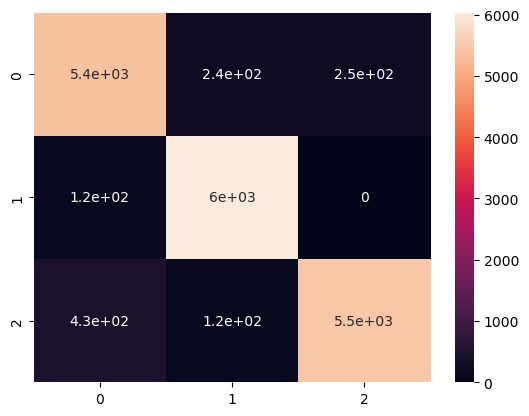

In [64]:
#Heatmap 시각화 (confusion matrix 시각화하기)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict_test)

# 혼동 행렬을 DataFrame으로 변환
cm_df = pd.DataFrame(cm, columns=y.unique(), index=y.unique())

sns.heatmap(cm, annot=True)

# 4. 모델링 - Multinomial Logistic Regression (원본 Resampled Data)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import itertools

In [34]:
X = resampled_data[["온도", '시정', '전운량', '최저운고', '풍속', '강수량(mm)']]
y = resampled_data['현황']

### Hyper Parameter Tuning - GridSearchCV

In [35]:
# 테스트하고자 하는 파라미터 값들을 사전 타입으로 정의
mlr = LogisticRegression(random_state=42, multi_class='multinomial', solver='saga')
parameters = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2']}

# 테스트와 훈련 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# 데이터 스케일 조정
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 찾기
grid_mlr = GridSearchCV(mlr, param_grid=parameters, cv=5)
grid_mlr.fit(X_train_scaled, y_train)

# 결과를 DataFrame으로 표시
result = pd.DataFrame(grid_mlr.cv_results_['params'])
result['mean_test_score'] = grid_mlr.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False, inplace=True)

# 결과 출력
print("Best Hyperparameters:", grid_mlr.best_params_)
print("GridSearchCV Results:\n", result)

Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}
GridSearchCV Results:
         C penalty  mean_test_score
0   0.001      l2         0.601481
3   1.000      l2         0.600683
4  10.000      l2         0.600683
2   0.100      l2         0.600666
1   0.010      l2         0.600657


In [36]:
# 최적의 하이퍼파라미터로 모델 생성
best_mlr = LogisticRegression(random_state=42, multi_class='multinomial', solver='saga', max_iter = 1000, C=0.001, penalty='l2')
best_mlr.fit(X_train_scaled, y_train)

LogisticRegression(C=0.001, max_iter=1000, multi_class='multinomial',
                   random_state=42, solver='saga')

### 교차검증

In [39]:
# 교차검증
from sklearn.model_selection import cross_val_score, cross_validate

# # 데이터 스케일 조정
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_train)

# 교차 검증 수행
scores = cross_val_score(best_mlr, X, y, cv=5)
cv_results = cross_validate(best_mlr, X, y, cv=5)

print('교차검증 평균: ', scores.mean())
pd.DataFrame(cv_results)

교차검증 평균:  0.600865097702283


,fit_time,score_time,test_score
0,881.420461,0.405927,0.601158
1,112.715948,0.387525,0.601739
2,111.968354,0.459771,0.601348
3,111.578477,0.420325,0.600932
4,105.281230,0.449994,0.599148


### 학습결과평가

In [38]:
# 학습 결과 평가
from sklearn.metrics import classification_report, accuracy_score

best_mlr.fit(X_test_scaled, y_test)
predict_mlr = best_mlr.predict(X_test_scaled)
print(classification_report(y_test, predict_mlr, zero_division=0))
accuracy = accuracy_score(y_test, predict_mlr)
print("Accuracy of Multinomial Logistic Regression: ", accuracy)

              precision    recall  f1-score   support

       기상 지연       0.65      0.65      0.65    159849
       기상 취소       0.57      0.60      0.59    159881
          출발       0.58      0.55      0.57    159730

    accuracy                           0.60    479460
   macro avg       0.60      0.60      0.60    479460
weighted avg       0.60      0.60      0.60    479460

Accuracy of Multinomial Logistic Regression:  0.6014474617277771


In [37]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn.datasets as d
import sklearn.model_selection as ms
import sklearn.metrics as mt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

# 글씨체 보이기
plt.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

## 2만개로 출발 데이터 줄이기

In [38]:
# 데이터프레임에서 "출발"인 값을 가진 행을 추출
selected_data = df[df['현황'] == "출발"]

# 랜덤하게 20,000개 추출
random_selected_data = selected_data.sample(n=20000, random_state=42)

# 지연 데이터 와 취소 데이터 추출하기
delay_data = df[df['현황'] == "기상 지연"]
cancel_data = df[df['현황'] == '기상 취소']

new = [random_selected_data, delay_data, cancel_data]

# 데이터프레임들을 수직 방향으로 합치기
df = pd.concat(new, axis=0, ignore_index=True)
df
print(df['현황'].value_counts())

출발       20000
기상 지연     4918
기상 취소      473
Name: 현황, dtype: int64


In [39]:
df

,날짜,항공사,편명,출발공항코드,출발공항명,도착공항코드,도착공항명,계획시간,예상시간,출발시간,시간,온도,시정,전운량,최저운고,풍속,강수량(mm),구분,현황,사유
0,2019-04-29 00:00:00,대한항공,KE8213,ICN,인천,LAX,로스앤젤레스,01:20,01:20,01:27,01:00,9.8,1000,7,200.0,2,0.0,화물,출발,NaN
1,2018-04-02 00:00:00,필리핀항공,PR487,ICN,인천,KLO,칼리보,08:25,08:25,08:50,08:00,14.6,450,6,40.0,8,0.0,여객,출발,NaN
2,2019-01-31 00:00:00,대한항공,KE893,ICN,인천,PVG,푸동,08:35,08:35,09:00,08:00,-2.9,1000,8,100.0,13,0.0,여객,출발,NaN
3,2017-05-10 00:00:00,에어캐나다,AC064,ICN,인천,YVR,밴쿠버,15:20,15:20,15:46,15:00,17.8,1000,0,0.0,15,0.0,여객,출발,NaN
4,2018-04-02 00:00:00,싱가폴항공,SQ008,ICN,인천,LAX,로스앤젤레스,11:20,11:20,11:49,11:00,20.2,900,2,40.0,9,0.0,여객,출발,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25386,2019-12-02 00:00:00,진에어,LJ023,ICN,인천,CRK,클라크 국제공항,21:35,:,:,21:00,-1.3,1000,8,30.0,3,0.0,여객,기상 취소,태풍
25387,2019-12-09 00:00:00,산동항공,SC4988,ICN,인천,TNA,지난,22:05,:,:,22:00,8.8,600,8,20.0,16,0.0,여객,기상 취소,시정
25388,2019-12-10 00:00:00,산동항공,SC4988,ICN,인천,TNA,지난,22:05,22:05,:,22:00,8.6,180,6,20.0,11,0.0,여객,기상 취소,시정
25389,2019-12-09 00:00:00,산동항공,SC4722,ICN,인천,TAO,청도,23:50,:,:,23:00,9.8,600,8,20.0,13,0.0,여객,기상 취소,시정


### 2만개 데이터 증폭 전 분포

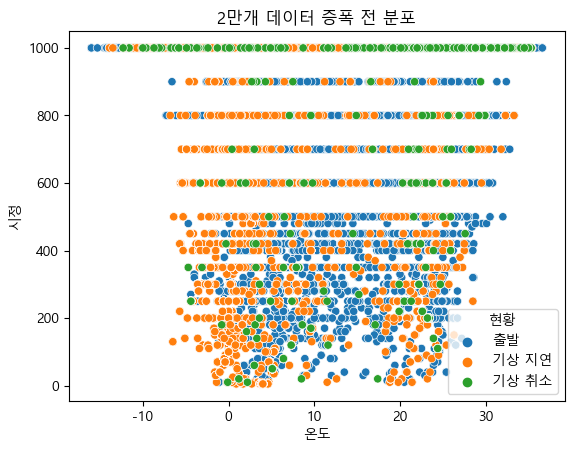

In [45]:
# 사용할 칼럼들을 추출 (기상 요건들과 운송 현황)
selected = ['온도','시정', '전운량', '최저운고','풍속', '강수량(mm)', '현황']
sdf3 = df[selected]

sns.scatterplot(data=sdf3, x=sdf3.iloc[:, 0], y=sdf3.iloc[:, 1], hue='현황')
plt.title("2만개 데이터 증폭 전 분포")
plt.savefig('/Users/user/Documents/DataMining/termproject.png')

## 2만개 데이터 resample

In [41]:
# 각 카테고리별 데이터 개수 출력
print("원본 데이터셋의 각 카테고리별 개수:")
print(df['현황'].value_counts())

# 출발 이외의 데이터를 추출
non_departure_data = df[df['현황'] != '출발']

# 출발 데이터만 따로 추출
departure_data = df[df['현황'] == '출발']

# 각 카테고리별 데이터 개수에 맞게 샘플링
from sklearn.utils import resample
resampled_data = pd.concat([
    resample(df[df['현황'] == category], replace=True, n_samples=df['현황'].value_counts().max(), random_state=42)
    for category in df['현황'].unique()
])

# 새로운 데이터셋의 각 카테고리별 개수 출력
print("\n새로운 데이터셋의 각 카테고리별 개수:")
print(resampled_data['현황'].value_counts())

원본 데이터셋의 각 카테고리별 개수:
출발       20000
기상 지연     4918
기상 취소      473
Name: 현황, dtype: int64

새로운 데이터셋의 각 카테고리별 개수:
출발       20000
기상 지연    20000
기상 취소    20000
Name: 현황, dtype: int64


In [42]:
resampled_data

,날짜,항공사,편명,출발공항코드,출발공항명,도착공항코드,도착공항명,계획시간,예상시간,출발시간,시간,온도,시정,전운량,최저운고,풍속,강수량(mm),구분,현황,사유
15795,2018-04-06 00:00:00,대한항공,KE847,ICN,인천,TNA,지난,13:10,13:10,13:50,13:00,8.4,500,6,30.0,20,0.0,여객,출발,NaN
860,2019-06-29 00:00:00,이스타항공,ZE611,ICN,인천,KIX,간사이,08:45,08:45,08:55,08:00,20.4,600,8,7.0,3,0.5,여객,출발,NaN
5390,2019-08-11 00:00:00,티웨이항공,TW293,ICN,인천,FUK,후쿠오카,18:25,18:25,18:40,18:00,31.4,1000,8,40.0,14,0.0,여객,출발,NaN
11964,2019-09-19 00:00:00,아시아나항공,OZ3533,ICN,인천,CKG,충칭,10:15,10:15,10:39,10:00,21.0,1000,0,0.0,8,0.0,여객,출발,NaN
11284,2017-12-02 00:00:00,에어아시아 엑스,D7505,ICN,인천,KUL,쿠알라룸푸르,15:55,15:55,16:39,15:00,6.8,1000,4,30.0,10,0.0,여객,출발,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25157,2018-09-15 00:00:00,유피에스화물항공,5X195,ICN,인천,ANC,앵커리지,23:35,:,:,23:00,23.8,1000,7,40.0,6,0.0,화물,기상 취소,태풍
24928,2017-01-01 00:00:00,중국국제항공,CA802,ICN,인천,TSN,천진,17:05,:,:,17:00,6.5,500,4,30.0,5,0.0,여객,기상 취소,시정
25055,2018-06-26 00:00:00,대한항공,KE1407,ICN,인천,PUS,김해,19:35,:,:,19:00,21.3,250,8,7.0,17,0.0,여객,기상 취소,운고
25084,2018-07-22 00:00:00,상해항공,FM828,ICN,인천,PVG,푸동,18:25,:,:,18:00,31.3,1000,5,200.0,5,0.0,여객,기상 취소,태풍


### 2만개 데이터 증폭 후 분포 (Resample)

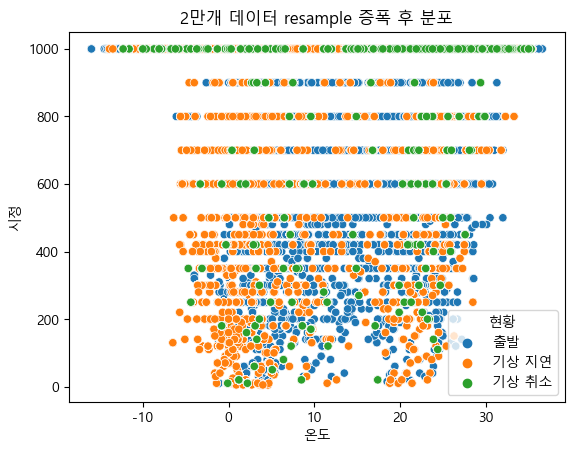

In [43]:
# 사용할 칼럼들을 추출 (기상 요건들과 운송 현황)
selected = ['온도','시정', '전운량', '최저운고','풍속', '강수량(mm)', '현황']
sdf4 = resampled_data[selected]

sns.scatterplot(data=sdf4, x=sdf4.iloc[:, 0], y=sdf4.iloc[:, 1], hue='현황')
plt.title("2만개 데이터 resample 증폭 후 분포")
plt.savefig('/Users/user/Documents/DataMining/termproject.png')

In [46]:
X = resampled_data[["온도", '시정', '전운량', '최저운고', '풍속', '강수량(mm)']]
y = resampled_data['현황']
#test, training (7:3 분할)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 100)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42000, 6) (18000, 6) (42000,) (18000,)


# 4. 모델링 - Decision Tree (2만개 Resampled Data)

### Hyper Parameter Tuning - GridSearchCV


In [47]:
from sklearn.model_selection import GridSearchCV

#테스트하고자 하는 파라미터 값들을 사전 타입으로 정의
dt = DecisionTreeClassifier(random_state = 33)
parameters = {'max_depth': [10, 15, 20, 25, 30],
              'min_samples_split': [16, 32, 64],
              'splitter': ['best', 'random']}

grid_dt = GridSearchCV(dt,
                      param_grid = parameters, cv = 5
                      )

grid_dt.fit(X_test, y_test)

result = pd.DataFrame(grid_dt.cv_results_['params'])
result['mean_test_score'] = grid_dt.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,max_depth,min_samples_split,splitter,mean_test_score
24,30,16,best,0.850611
18,25,16,best,0.850556
12,20,16,best,0.848833
25,30,16,random,0.837167
19,25,16,random,0.836889
6,15,16,best,0.828722
13,20,16,random,0.826111
26,30,32,best,0.815444
20,25,32,best,0.815444
14,20,32,best,0.814833


In [49]:
# 최적의 DT 만들기
best_params = {'max_depth' : 30, 'min_samples_split': 16, 'splitter': 'best'}

#최적 파라미터 조합으로 DecisionTreeClassifier 초기화
best_dt = DecisionTreeClassifier(**best_params)

#최적모델로 학습
best_dt.fit(X_test, y_test)

DecisionTreeClassifier(max_depth=30, min_samples_split=16)

### 교차검증

In [51]:
from sklearn.model_selection import cross_val_score, cross_validate

#각 폴드의 스코어
scores = cross_val_score(best_dt, X, y, cv = 5)
scores

pd.DataFrame(cross_validate(best_dt, X, y, cv = 5))
print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.9081333333333333


### 학습결과평가

In [52]:
predict_test = best_dt.predict(X_test)

# 학습결과평가
from sklearn.metrics import classification_report

print('Test Data:\n', classification_report(y_test, predict_test, zero_division=0))

Test Data:
               precision    recall  f1-score   support

       기상 지연       0.89      0.86      0.88      5845
       기상 취소       0.93      0.99      0.96      6151
          출발       0.91      0.88      0.90      6004

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



# 4. 모델링 - Random Forest (2만개 Resampled Data)

### Hyper Parameter Tuning - GridSearchCV

In [53]:
#하이퍼 파라미터 튜닝(그리드 서치)

from sklearn.model_selection import GridSearchCV

#테스트하고자 하는 파라미터 값들을 사전 타입으로 정의
rf = RandomForestClassifier(random_state=10)

parameters = {'n_estimators': [120, 130, 140],
              'max_depth': [20, 30, 40],
              'min_samples_split': [4, 8, 16]}

grid_rf = GridSearchCV(rf, # estimator 객체,
                      param_grid = parameters, cv = 5
                      # n_jobs = -1: 모든 cpu를 사용)
                      )

grid_rf.fit(X_train, y_train)

result = pd.DataFrame(grid_rf.cv_results_['params'])
result['mean_test_score'] = grid_rf.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,max_depth,min_samples_split,n_estimators,mean_test_score
18,40,4,120,0.926524
19,40,4,130,0.926476
20,40,4,140,0.926452
10,30,4,130,0.926452
11,30,4,140,0.926405
9,30,4,120,0.926357
0,20,4,120,0.924619
2,20,4,140,0.924524
1,20,4,130,0.924476
12,30,8,120,0.918381


In [54]:
best_params_rf = grid_rf.best_params_
print("Best Parameters for Random Forest:", best_params_rf)

#최적 파라미터 조합으로 RandomForestClassifier 초기화
best_rf = RandomForestClassifier(**best_params_rf)

#최적모델로 학습
best_rf.fit(X_train, y_train)

# 최적 모델 평가
predict = best_rf.predict(X_test)
print("Accuracy of the Best Random Forest model:", accuracy_score(y_test,predict)) 

Best Parameters for Random Forest: {'max_depth': 40, 'min_samples_split': 4, 'n_estimators': 120}
Accuracy of the Best Random Forest model: 0.9356111111111111


### 교차검증

In [55]:
#교차검증: 검증데이터셋 나눠서 평가하기 (데이터셋: training, test, validation 으로 나눔)

from sklearn.model_selection import cross_val_score, cross_validate

#각 폴드의 스코어
scores = cross_val_score(best_rf, X, y, cv = 5)
scores

pd.DataFrame(cross_validate(best_rf, X, y, cv = 5))
print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.9365166666666667


### 학습결과평가

In [56]:
predict_test = best_rf.predict(X_test)

# 학습결과평가
from sklearn.metrics import classification_report

print('Test Data:\n', classification_report(y_test, predict_test, zero_division=0))

Test Data:
               precision    recall  f1-score   support

       기상 지연       0.91      0.92      0.91      5845
       기상 취소       0.94      0.98      0.96      6151
          출발       0.96      0.91      0.93      6004

    accuracy                           0.94     18000
   macro avg       0.94      0.94      0.94     18000
weighted avg       0.94      0.94      0.94     18000



### confusion map

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

<Axes: >

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Fon

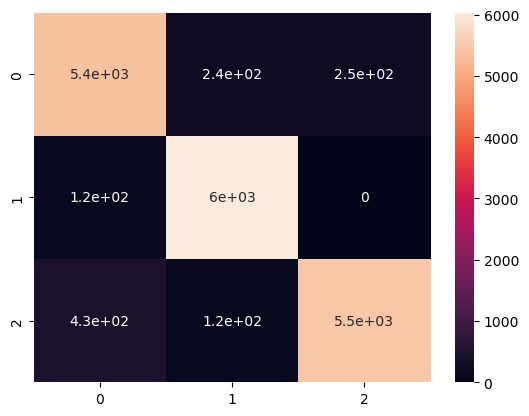

In [58]:
#Heatmap 시각화 (confusion matrix 시각화하기)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predict)

# 혼동 행렬을 DataFrame으로 변환
cm_df = pd.DataFrame(cm, columns=y.unique(), index=y.unique())

sns.heatmap(cm, annot=True)

# 4. 모델링 - Multinomial Logistic Regression (2만개 Resampled Data)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import itertools

### Hyper Parameter Tuning - GridSearchCV

In [60]:
# 테스트하고자 하는 파라미터 값들을 사전 타입으로 정의
mlr = LogisticRegression(random_state=42, multi_class='multinomial', solver='saga')
parameters = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2']}

# 테스트와 훈련 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# 데이터 스케일 조정
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 찾기
grid_mlr = GridSearchCV(mlr, param_grid=parameters, cv=5)
grid_mlr.fit(X_train_scaled, y_train)

# 결과를 DataFrame으로 표시
result = pd.DataFrame(grid_mlr.cv_results_['params'])
result['mean_test_score'] = grid_mlr.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False, inplace=True)

# 결과 출력
print("Best Hyperparameters:", grid_mlr.best_params_)
print("GridSearchCV Results:\n", result)

Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}
GridSearchCV Results:
         C penalty  mean_test_score
0   0.001      l2         0.605905
1   0.010      l2         0.603786
3   1.000      l2         0.603143
4  10.000      l2         0.603143
2   0.100      l2         0.603119


In [61]:
# 최적의 하이퍼파라미터로 모델 생성
best_mlr = LogisticRegression(random_state=42, multi_class='multinomial', solver='saga', max_iter = 1000, C=0.001, penalty='l2')
best_mlr.fit(X_train_scaled, y_train)

LogisticRegression(C=0.001, max_iter=1000, multi_class='multinomial',
                   random_state=42, solver='saga')

### 교차검증

In [62]:
# 교차검증
from sklearn.model_selection import cross_val_score, cross_validate

# 교차 검증 수행
scores = cross_val_score(best_mlr, X, y, cv=5)
cv_results = cross_validate(best_mlr, X, y, cv=5)

print('교차검증 평균: ', scores.mean())
pd.DataFrame(cv_results)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

교차검증 평균:  0.5985333333333334


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,fit_time,score_time,test_score
0,18.300400,0.015622,0.603750
1,17.660924,0.019701,0.597667
2,18.673146,0.031246,0.600083
3,19.452140,0.031245,0.599000
4,18.914699,0.031240,0.592167


### 학습결과평가

In [63]:
# 학습 결과 평가
from sklearn.metrics import classification_report, accuracy_score

best_mlr.fit(X_test_scaled, y_test)
predict_mlr = best_mlr.predict(X_test_scaled)
print(classification_report(y_test, predict_mlr, zero_division=0))
accuracy = accuracy_score(y_test, predict_mlr)
print("Accuracy of Multinomial Logistic Regression: ", accuracy)

              precision    recall  f1-score   support

       기상 지연       0.66      0.64      0.65      5845
       기상 취소       0.58      0.62      0.60      6151
          출발       0.58      0.55      0.57      6004

    accuracy                           0.61     18000
   macro avg       0.61      0.61      0.61     18000
weighted avg       0.61      0.61      0.61     18000

Accuracy of Multinomial Logistic Regression:  0.6057777777777777
